# 06-Logistic Regression: Solutions

## 모듈 불러오기

In [1]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 구축 및 평가 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 한글 폰트 설정
# plt.rc('font', family='Malgun Gothic')

# !git clone https://github.com/KU-DIC/LG_time_series_day03.git

## 데이터 불러오기

### Parkinson 질병 예측
: This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

### 타겟변수(Y): status (1:Parkinson, 0:Healthy)

### 0: 정상 / 1: 환자

In [2]:
# data = pd.read_csv('/content/LG_time_series_day03/Data/Parkinson.csv') (구글 코랩 이용하시는 분 참고)
data = pd.read_csv('data/Parkinson.csv')
data.head()

,name,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,1,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,phon_R01_S01_2,1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,phon_R01_S01_3,1,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,phon_R01_S01_4,1,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,phon_R01_S01_5,1,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


## 데이터 전처리

### 데이터 행과 열 개수 확인

In [3]:
data.shape

(195, 24)

### Column별 기초 통계량 확인

In [4]:
data.describe()

,status,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,0.753846,6.832142e-18,-2.368476e-16,7.743094e-17,1.821904e-17,1.821904e-17,-1.275333e-16,9.109522e-17,7.287618e-17,2.584827e-16,...,-9.109522e-17,-1.625480e-16,1.093143e-16,8.927332e-16,-1.002047e-16,5.830094e-16,1.193347e-15,-1.184238e-16,-5.921189e-16,1.821904e-17
std,0.431878,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,0.000000,-1.596162e+00,-1.040581e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.180440e-01,-8.873331e-01,-1.072340e+00,...,-9.993055e-01,-1.097815e+00,-6.002051e-01,-3.045707e+00,-2.333888e+00,-2.605676e+00,-2.097268e+00,-2.647338e+00,-2.510472e+00,-1.802384e+00
25%,1.000000,-8.879183e-01,-6.820590e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.764609e-01,-5.557071e-01,-7.020291e-01,...,-6.508513e-01,-7.326182e-01,-4.693595e-01,-6.089102e-01,-7.449206e-01,-7.852617e-01,-7.041503e-01,-6.269844e-01,-7.404100e-01,-7.687420e-01
50%,1.000000,-1.317379e-01,-2.331437e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.748504e-01,-2.736279e-01,-3.583019e-01,...,-3.444009e-01,-2.841460e-01,-3.271036e-01,4.508553e-02,-2.490033e-02,7.527941e-02,-3.353960e-02,-9.166005e-02,-5.315145e-02,-1.390580e-01
75%,1.000000,6.913210e-01,2.969710e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.848331e-01,1.784870e-01,4.346898e-01,...,3.146448e-01,4.543110e-01,1.966835e-02,7.225273e-01,8.587132e-01,7.932500e-01,5.869042e-01,6.337615e-01,6.668912e-01,5.165137e-01
max,1.000000,2.564598e+00,4.327631e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.862742e+00,6.126923e+00,4.751617e+00,...,6.726438e+00,4.029746e+00,7.192738e+00,2.528321e+00,1.800007e+00,1.942048e+00,2.989093e+00,2.692370e+00,3.376831e+00,3.569059e+00


### 필요하지 않은 변수 제거

In [5]:
data = data.drop('name', axis=1)

### 설명변수(X), 반응변수(y) 나누기

In [6]:
X = data.drop('status', axis=1)
y = data['status']

display(X.head(3))

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661


### 변수별 target y 값 분포 확인

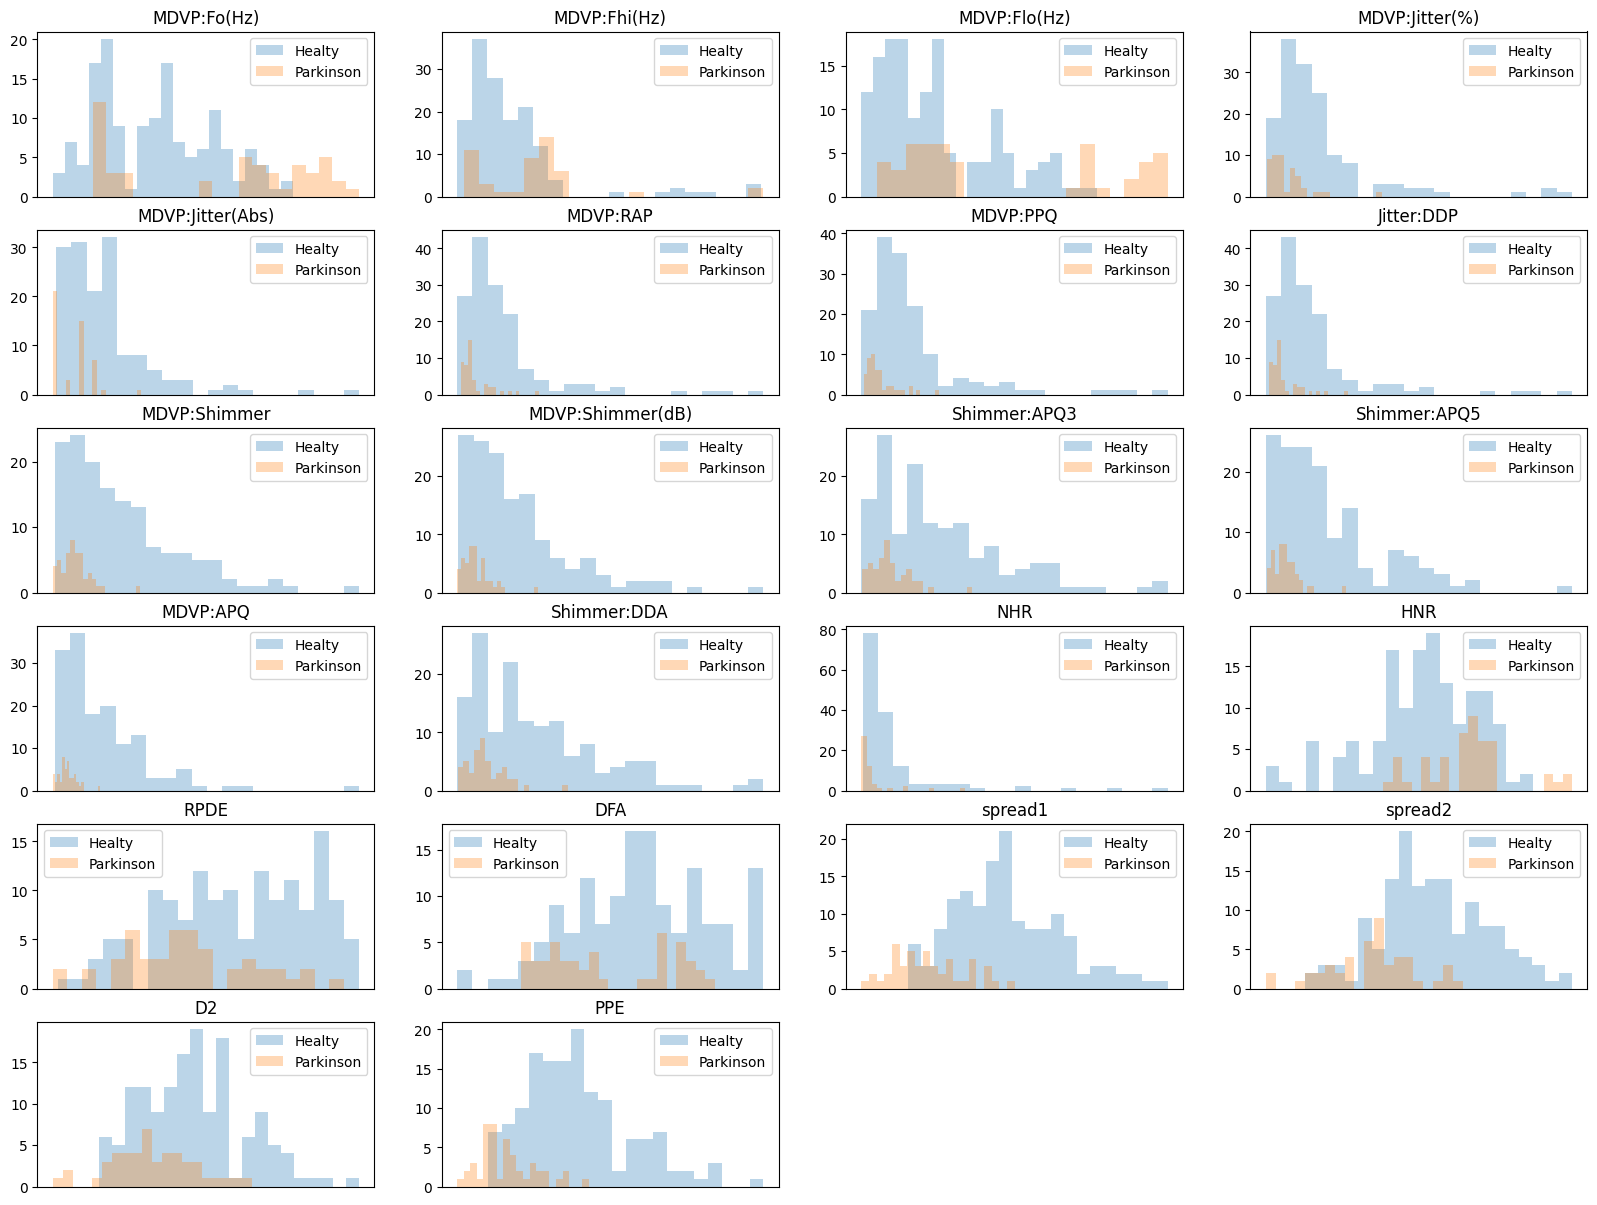

In [7]:
parkinson = X.loc[y==1]
healthy =  X.loc[y==0]

plt.figure(figsize=[20,15])

for col in range(22):
    plt.subplot(6,4,col+1)
    plt.hist(parkinson.iloc[:,col],bins=20, alpha=0.3) # 막대 너비 = 전체 구간을 bins=20으로 나누어 준 너비
    plt.hist(healthy.iloc[:,col], bins=20 ,alpha=0.3) # alpha 는 투명도(0~1)를 조절
    plt.title(X.columns[col])
    plt.legend(['Healty', 'Parkinson'])
    plt.xticks([])

### Training 데이터 70% / Testing 데이터 30% 나누기

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2023)

### 데이터 전처리 (정규화)

In [11]:
normalizer = StandardScaler() 
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

## 모델링

In [12]:
# model 불러오기
model = LogisticRegression()

# model 학습시키기
model.fit(X_train, y_train)

LogisticRegression()

## 모델 결과물 확인 (변수별 beta, exp(beta) 확인)

In [13]:
# 데이터 컬럼에 따른 beta, exp(beta) 체크
column_name = ["const"] + X.columns.tolist()
beta = np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2) # round(2) 소수점 둘째짜리까지 반올림
odds = np.exp(beta).round(2) # round(2) 소수점 둘째짜리까지 반올림
interpret = np.where(beta>0,'risky','protective') # np.where() 조건문 

# beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta,odds,interpret],index=column_name, columns=['beta','exp(beta)','interpret'])
beta_analysis

,beta,exp(beta),interpret
const,2.34,10.38,risky
MDVP:Fo(Hz),-0.23,0.79,protective
MDVP:Fhi(Hz),-0.29,0.75,protective
MDVP:Flo(Hz),-0.24,0.79,protective
MDVP:Jitter(%),-0.39,0.68,protective
MDVP:Jitter(Abs),-0.79,0.45,protective
MDVP:RAP,0.92,2.51,risky
MDVP:PPQ,-0.04,0.96,protective
Jitter:DDP,0.92,2.51,risky
MDVP:Shimmer,0.14,1.15,risky


### Numpy를 통해 계산한 결과와 model.predict_proba() 함수를 사용한 결과 비교

In [15]:
probs = model.predict_proba(X_test)[:,1]

## beta 곱하기 X 계산 (np.c_ :상수항 파트)
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))

## P(Y=1) 계산
P_1 = 1 / (1+np.exp(-Xbeta))

## 패키지와 직접 계산 결과 비교
pd.DataFrame(np.concatenate([P_1,probs.reshape(-1,1)],axis=1),columns=['직접','패키지'])[:10]

,직접,패키지
0,0.955606,0.955398
1,0.999999,0.999999
2,0.715354,0.713841
3,0.960383,0.960099
4,0.995561,0.995548
5,0.741818,0.741877
6,0.860257,0.860478
7,0.826169,0.825237
8,0.988634,0.988521
9,0.800626,0.800421


### 산출한 예측 결과값의 성능을 Cut off 값을 변경하며 Accuracy 관찰할 것.

In [16]:
Cut_off = np.linspace(0,1,11)

## cut off 값 여러개 만들어두기
for cutoff in Cut_off:
    y_pred = np.where(probs.reshape(-1)>=cutoff,1,0) # 확률값이 cuf off보다 크면 1(유방암), 아니면 0(유방암x)
    acc = accuracy_score(y_true = y_test, y_pred =y_pred) ## 정확도
    recall = recall_score(y_true = y_test, y_pred =y_pred) ## 민감도
    precision = precision_score(y_true = y_test, y_pred =y_pred) ## 정밀도
    
    print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}",f"cut off:{cutoff:0.2f}", sep='  |  ')  

정확도:0.73  |  민감도:1.00  |  정밀도:0.73  |  cut off:0.00
정확도:0.80  |  민감도:1.00  |  정밀도:0.78  |  cut off:0.10
정확도:0.86  |  민감도:1.00  |  정밀도:0.84  |  cut off:0.20
정확도:0.88  |  민감도:0.98  |  정밀도:0.88  |  cut off:0.30
정확도:0.85  |  민감도:0.93  |  정밀도:0.87  |  cut off:0.40
정확도:0.88  |  민감도:0.93  |  정밀도:0.91  |  cut off:0.50
정확도:0.88  |  민감도:0.91  |  정밀도:0.93  |  cut off:0.60
정확도:0.85  |  민감도:0.86  |  정밀도:0.93  |  cut off:0.70
정확도:0.80  |  민감도:0.77  |  정밀도:0.94  |  cut off:0.80
정확도:0.73  |  민감도:0.65  |  정밀도:0.97  |  cut off:0.90
정확도:0.27  |  민감도:0.00  |  정밀도:0.00  |  cut off:1.00


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 최종 Cut-off에 대해 Confusion Matrix 그려보기

In [17]:
best_cut_off = 0.5
y_pred = np.where(probs.reshape(-1)>=best_cut_off,1,0) # 확률값이 cuf off보다 크면 1(유방암), 아니면 0(유방암x)
cm = confusion_matrix(y_true = y_test, y_pred =y_pred)

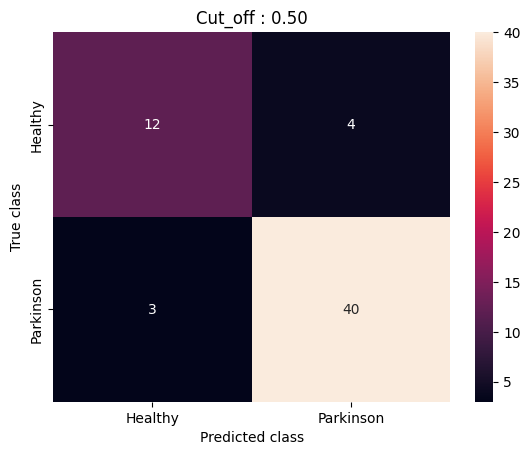

In [18]:
sns.heatmap(cm, xticklabels=['Healthy', 'Parkinson'], yticklabels=['Healthy', 'Parkinson'], annot=True, fmt="d");
plt.title("Cut_off : {:.2f}".format(best_cut_off))
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### ROC Curve 그려보기

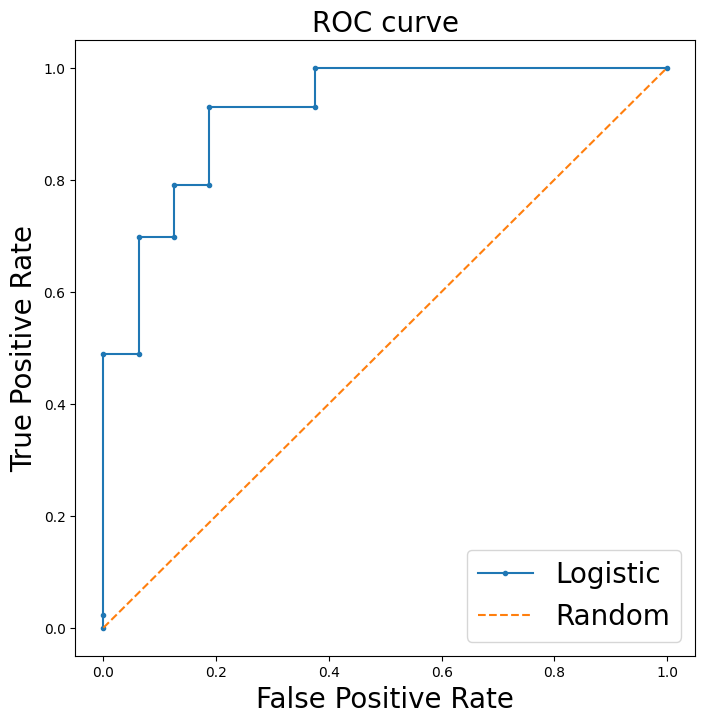

In [20]:
# Roc curve X 축, Y축 추출
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(len(X_test))])

# plot the roc curve for the model and random
plt.figure(figsize=(8,8))
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')

# axis labels
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
 
# show the legend
plt.legend(fontsize=20)
 
# show the plot
plt.title("ROC curve",size=20)
plt.show()